<a href="https://colab.research.google.com/github/PiedinoTimido/EpsteinName/blob/main/Epstein_name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epstein Graph, To let it work, just start the colab, and add to the disk, in the root, the csv file with the name:

```
epstein_names.csv
```



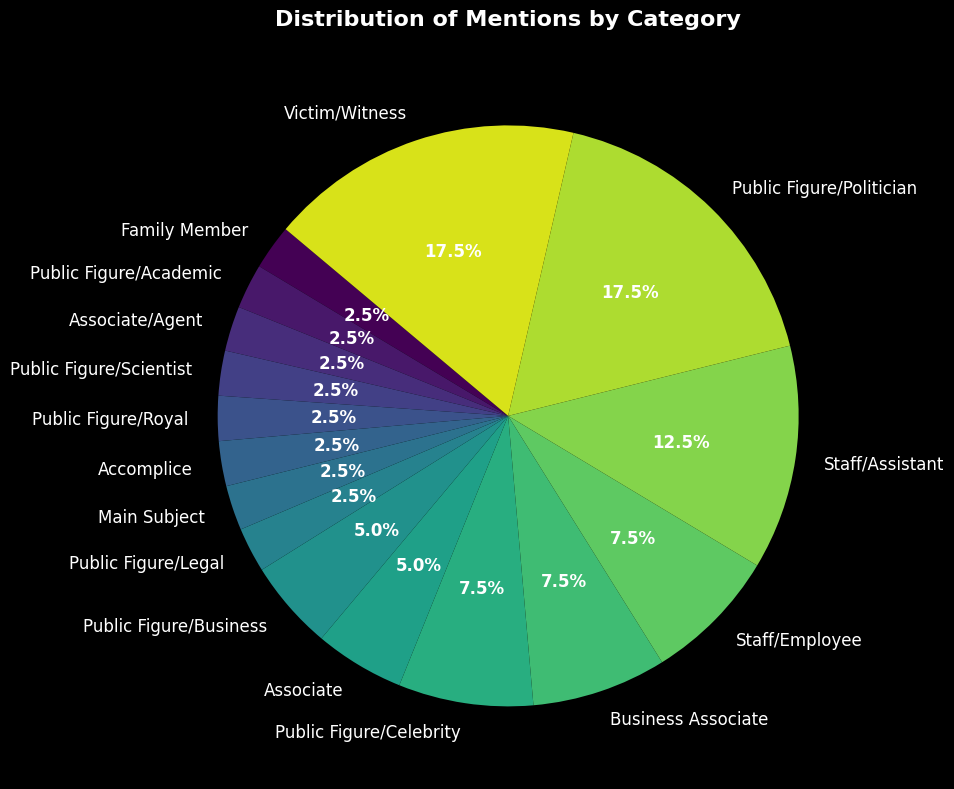

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'epstein_names.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

cat_counts = df['Category'].value_counts().sort_values()

fig, ax = plt.subplots(figsize=(10, 8), facecolor='#000000')
ax.set_facecolor('#000000')

colors = plt.cm.viridis(range(0, 256, 256 // len(cat_counts)))

patches, texts, autotexts = ax.pie(
    cat_counts,
    labels=cat_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    textprops={'color': "w", 'fontsize': 12}
)

for autotext in autotexts:
    autotext.set_weight('bold')

plt.title('Distribution of Mentions by Category', color='white', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

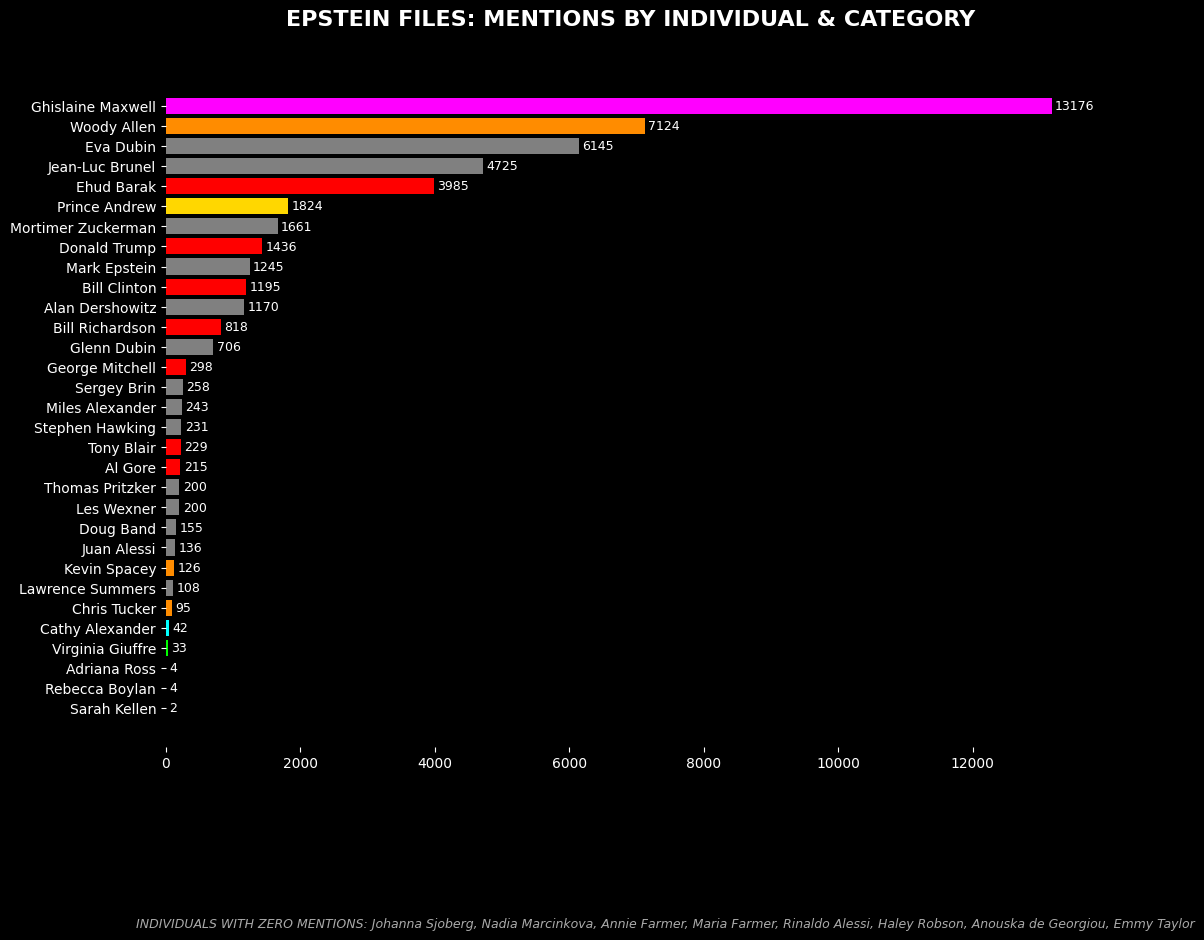

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'epstein_names.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
df['N. of documents with his name'] = df['N. of documents with his name'].astype(str).str.replace(',', '', regex=False).fillna('0').astype(int)

with_mentions = df[(df['N. of documents with his name'] > 0) & (df['Name'] != 'Jeffrey Epstein')].sort_values('N. of documents with his name', ascending=False)
zero_mentions = df[df['N. of documents with his name'] == 0]['Name'].tolist()

category_colors = {
    'Public Figure/Politician': '#ff0000',
    'Public Figure/Royal': '#ffd700',
    'Accomplice': '#ff00ff',
    'Victim/Witness': '#00ff00',
    'Staff/Assistant': '#00ffff',
    'Public Figure/Celebrity': '#ff8c00',
}
colors_list = [category_colors.get(cat, '#808080') for cat in with_mentions['Category']]


fig, ax = plt.subplots(figsize=(12, 10), facecolor='black')
ax.set_facecolor('black')
bars = ax.barh(with_mentions['Name'], with_mentions['N. of documents with his name'], color=colors_list)
ax.tick_params(axis='both', colors='white', labelsize=10)
ax.invert_yaxis()
for bar in bars:
    width = bar.get_width()
    ax.text(width + 50, bar.get_y() + bar.get_height()/2,
            f'{int(width)}', color='white', va='center', fontsize=9)

plt.title('EPSTEIN FILES: MENTIONS BY INDIVIDUAL & CATEGORY', color='white', fontsize=16, fontweight='bold', pad=30)

for spine in ax.spines.values():
    spine.set_visible(False)

zero_text = "INDIVIDUALS WITH ZERO MENTIONS: " + ", ".join(zero_mentions)
plt.figtext(0.1, 0.02, zero_text, wrap=True, horizontalalignment='left', fontsize=9, color='#aaaaaa', fontstyle='italic') # Changed fontweight to fontstyle

plt.subplots_adjust(bottom=0.2)
plt.show()